In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [21]:
img_path = '../img/1.jpg'

### 1.read image

(240, 320)


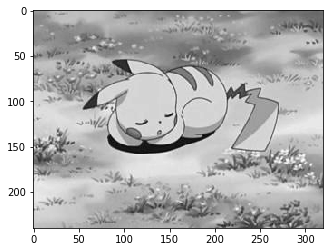

In [65]:
Image = cv2.imread(img_path)
image = cv2.cvtColor(Image,cv2.COLOR_BGRA2GRAY)
img = np.array(image,dtype='float64')
plt.imshow(img,cmap = 'gray')
print(img.shape)

### 2. initial

In [66]:
IniLSF = np.ones([img.shape[0],img.shape[1]],img.dtype)
IniLSF[40:80,40:80]=-1
IniLSF = -IniLSF

### 3. Draw the initial outline

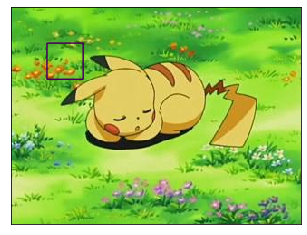

In [67]:
Image = cv2.cvtColor(Image,cv2.COLOR_BGR2RGB) 
plt.figure(1),plt.imshow(Image),plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
plt.contour(IniLSF,[0])  #画LSF=0处的等高线
plt.draw()

### 4.Definition

In [68]:
def mat_math (intput,str):
    output=intput 
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if str=="atan":
                output[i,j] = math.atan(intput[i,j]) 
            if str=="sqrt":
                output[i,j] = math.sqrt(intput[i,j]) 
    return output 

def CV (LSF, img, mu, nu, epison,step):

    Drc = (epison / math.pi) / (epison*epison+ LSF*LSF)
    Hea = 0.5*(1 + (2 / math.pi)*mat_math(LSF/epison,"atan")) 
    Iy, Ix = np.gradient(LSF) 
    s = mat_math(Ix*Ix+Iy*Iy,"sqrt") 
    Nx = Ix / (s+0.000001) 
    Ny = Iy / (s+0.000001) 
    Mxx,Nxx =np.gradient(Nx) 
    Nyy,Myy =np.gradient(Ny) 
    cur = Nxx + Nyy 
    Length = nu*Drc*cur 

    Lap = cv2.Laplacian(LSF,-1) 
    Penalty = mu*(Lap - cur) 

    s1=Hea*img 
    s2=(1-Hea)*img 
    s3=1-Hea 
    C1 = s1.sum()/ Hea.sum() 
    C2 = s2.sum()/ s3.sum() 
    CVterm = Drc*(-1 * (img - C1)*(img - C1) + 1 * (img - C2)*(img - C2)) 

    LSF = LSF + step*(Length + Penalty + CVterm) 
    return LSF 

### 5.Result

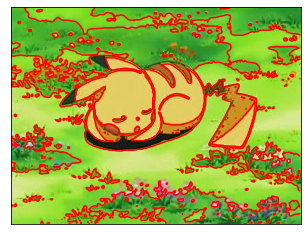

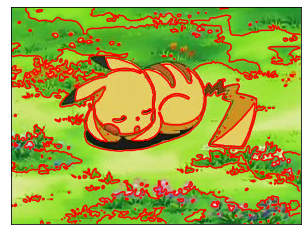

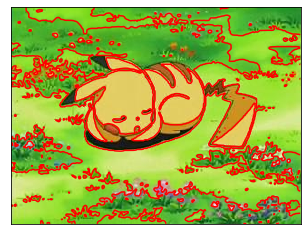

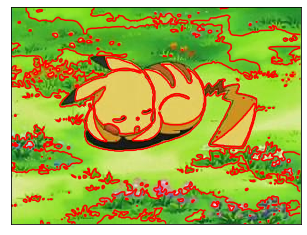

In [73]:
mu = 1 
nu = 0.003 * 255 * 255 
num = 10 
epison = 1 
step = 0.1 
LSF=IniLSF 
for i in range(1,num):
    #迭代
    LSF = CV(LSF, img, mu, nu, epison,step) 
    #显示分割轮廓
    if i % 2 == 0:    
        plt.imshow(Image),plt.xticks([]), plt.yticks([])  
        plt.contour(LSF,[0],colors='r') 
        plt.draw(),plt.show(block=False),plt.pause(0.01) 